In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
from scipy import stats
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import data

In [17]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data=pd.read_csv("iris/iris.data", header=None, names=column_names)
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Task 1. Show the plot (pairplot)

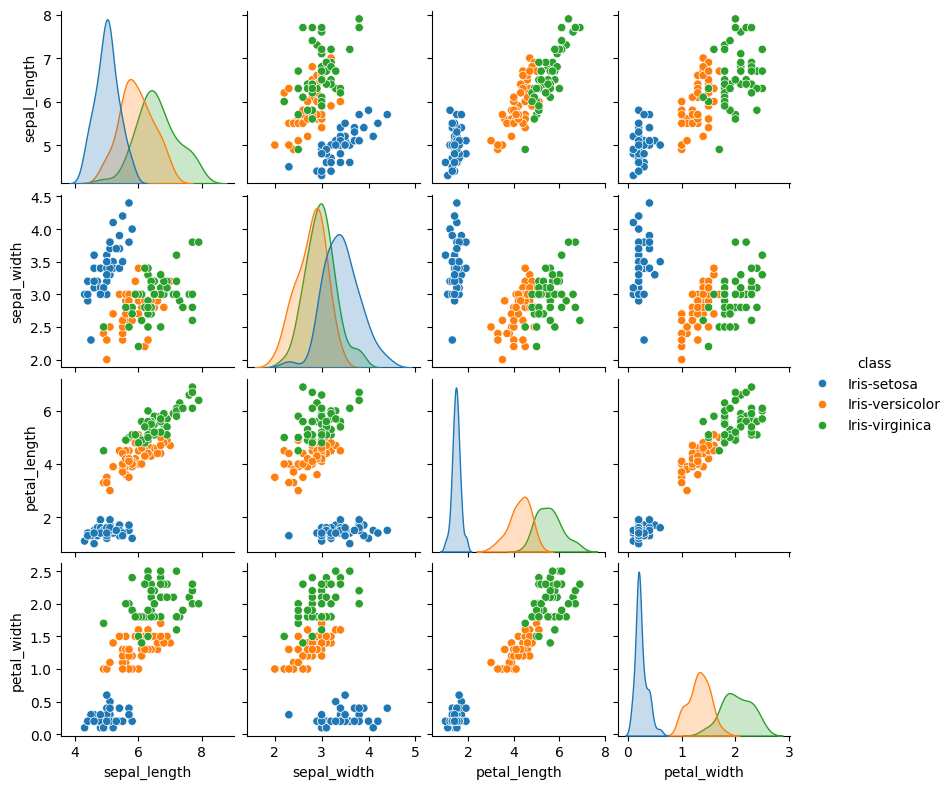

In [3]:
sns.pairplot(iris_data, hue='class', height=2)
plt.show()

# Task 2. LogisticRegression

Для бинарной классификации оставим лишь два класса. Удалим класс Iris-setosa (выделяющийся класс) чтобы задача была интереснее

In [4]:
binary_iris_data = iris_data.drop(index=iris_data.index[iris_data['class'] == 'Iris-setosa'])
binary_iris_data['class'] = binary_iris_data['class'].map({
    'Iris-versicolor': 0,
    'Iris-virginica': 1
})

binary_iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


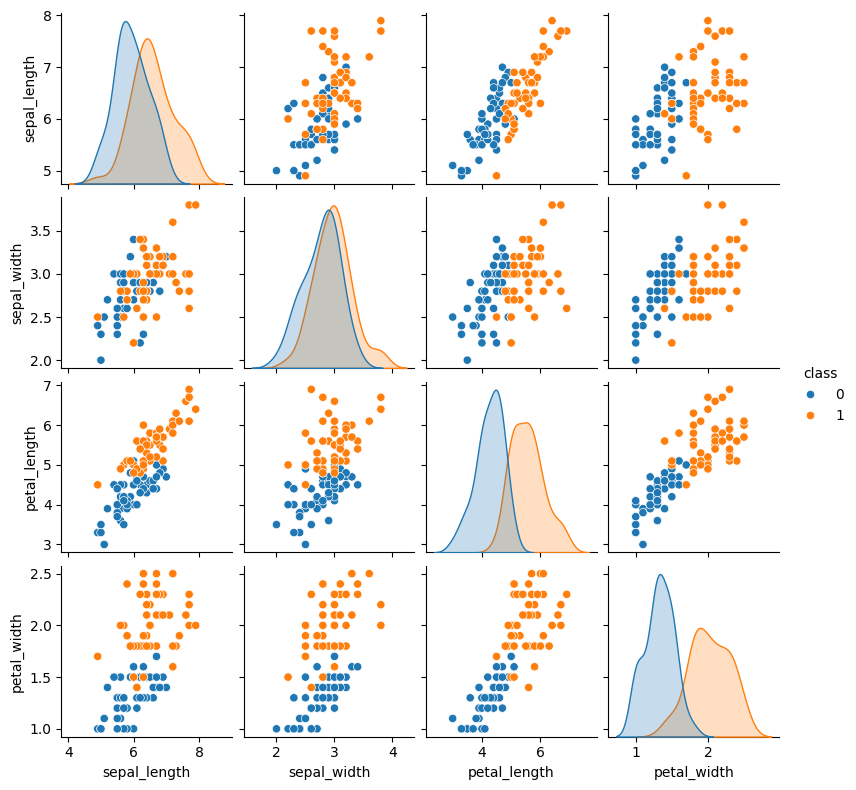

In [5]:
sns.pairplot(binary_iris_data, hue='class', height=2)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

X = binary_iris_data.drop(columns='class')
y = binary_iris_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
accuracy = model.score(X_test, y_test)
accuracy

0.95

# Task 3. Overtraining

## Generated data

### Data generating

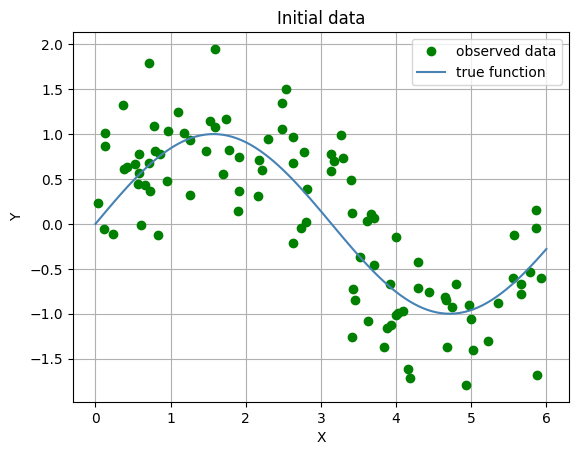

In [8]:
def regression_dataset(n=100):
    """Генерация исходных данных"""
    x = stats.uniform.rvs(size=n, loc=0, scale=6, random_state=0)
    f = lambda x: np.sin(x)
    y = stats.norm.rvs(size=n, loc=0, scale=0.5, random_state=0) + f(x)
    return (x, y, f)


# Инициализация исходных данных
x, y, f = regression_dataset()

# График
xx = np.linspace(0, 6, 100)
plt.plot(x, y, "o", color="green", label="observed data")
plt.plot(xx, f(xx), "-", color="SteelBlue", label="true function")
plt.title("Initial data")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### Overtraining

In [9]:
# Параметры
REGULARIZATION = 0
POLY_DEGREE = 15
# Представление признака x в матричной форме
X_ = x.reshape(-1, 1)

# Формирование обучающего и тестового подмножеств
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=200)

# Формирование последовательности действий
pipeline = Pipeline([
    ("polynomizer", PolynomialFeatures(degree=POLY_DEGREE, include_bias=False)), 
    ("standardizer", StandardScaler()),
    ("linear_model", Ridge(alpha=REGULARIZATION, fit_intercept=True))
])

# Обучение
pipeline.fit(X_train, y_train)

# Параметры обученной модели
print("Параметры модели:")
print("\tw{} = {}".format(0, pipeline.named_steps["linear_model"].intercept_))
for indx, coef in enumerate(pipeline.named_steps["linear_model"].coef_):
    print("\tw{} = {}".format(indx+1, coef))

Параметры модели:
	w0 = 0.10811614576671139
	w1 = 33.318507372386804
	w2 = -1579.4774950918827
	w3 = 31574.250821647292
	w4 = -354551.5868349616
	w5 = 2550294.0396253592
	w6 = -12590129.436150536
	w7 = 44351124.864396304
	w8 = -113949783.59755322
	w9 = 215685862.66172978
	w10 = -300663372.97129744
	w11 = 305025145.0479467
	w12 = -219083908.1221149
	w13 = 105579033.35453293
	w14 = -30616290.553648096
	w15 = 4036547.790822724


In [10]:
# Предсказания на обучающем и тестовом множествах
y_train__pred = pipeline.predict(X_train)
y_test__pred = pipeline.predict(X_test)

# Ошибки на обучающем множестве
mse_traint = mean_squared_error(y_train, y_train__pred)
r2_train = r2_score(y_train, y_train__pred)

print("Обучающее множество:")
print("\tTrain MSE:", mse_traint)
print("\tTrain R^2:", r2_train)

# Ошибки на тестовом множестве
mse_test = mean_squared_error(y_test, y_test__pred)
r2_test = r2_score(y_test, y_test__pred)

print("\nТестовое множество:")
print("\tTest MSE:", mse_test)
print("\tTest R^2:", r2_test)

Обучающее множество:
	Train MSE: 0.1788286804773897
	Train R^2: 0.7709294492902155

Тестовое множество:
	Test MSE: 0.36655000875697286
	Test R^2: 0.5076294926821885


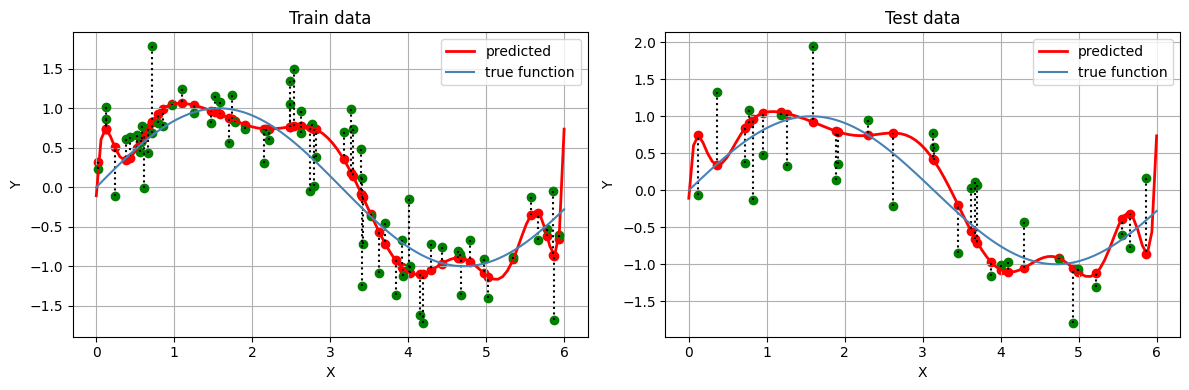

In [11]:
# Графики
xx = np.linspace(0, 6, 100).reshape(-1, 1)
plt.figure(figsize=[12, 4])

plt.subplot(1,2,1)

plt.title("Train data")
plt.plot(X_train, y_train, "o", color="green")
plt.plot(xx, pipeline.predict(xx), color="red", lw=2, label="predicted")
plt.scatter(X_train, y_train__pred, color="red")
plt.vlines(X_train, ymin=y_train, ymax=y_train__pred, colors="black", linestyles="dotted")
plt.plot(xx, f(xx), "-", color="SteelBlue", label="true function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)

plt.title("Test data")
plt.plot(X_test, y_test, "o", color="green")
plt.plot(xx, pipeline.predict(xx), color="red", lw=2, label="predicted")
plt.scatter(X_test, y_test__pred, color="red")
plt.vlines(X_test, ymin=y_test, ymax=y_test__pred, colors="black", linestyles="dotted")
plt.plot(xx, f(xx), "-", color="SteelBlue", label="true function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

### Regularization

In [12]:
# Параметры
REGULARIZATION = 0.001
POLY_DEGREE = 15

# Формирование последовательности действий с ридж-регрессией
pipeline = Pipeline([
    ("polynomizer", PolynomialFeatures(degree=POLY_DEGREE, include_bias=False)), 
    ("standardizer", StandardScaler()),
    ("linear_model", Ridge(alpha=REGULARIZATION, fit_intercept=True))
])

# Формирование последовательности действий с лассо-регрессией
# pipeline = Pipeline([
#     ("transformation", PolynomialFeatures(degree=15)), 
#     ("linear_model", Lasso(alpha=REGULARIZATION, fit_intercept=False))
# ])

# Обучение
pipeline.fit(X_train, y_train)

# Параметры обученной модели
print("Параметры модели:")
print("\tw{} = {}".format(0, pipeline.named_steps["linear_model"].intercept_))
for indx, coef in enumerate(pipeline.named_steps["linear_model"].coef_):
    print("\tw{} = {}".format(indx+1, coef))

Параметры модели:
	w0 = 0.10811608006829222
	w1 = 0.5461453198364771
	w2 = 1.3889567575850852
	w3 = -3.5509415758779035
	w4 = -3.7808022597613125
	w5 = -0.679560103582224
	w6 = 2.546450414915925
	w7 = 3.9680471060925475
	w8 = 3.370685281473313
	w9 = 1.5035051053306037
	w10 = -0.6564118020988012
	w11 = -2.3016088310741494
	w12 = -2.9205661677154686
	w13 = -2.280481445004385
	w14 = -0.3568799965228566
	w15 = 2.7426565457709344


In [13]:
# Предсказания на обучающем и тестовом множествах
y_train__pred = pipeline.predict(X_train)
y_test__pred = pipeline.predict(X_test)

# Ошибки на обучающем множестве
mse_traint = mean_squared_error(y_train, y_train__pred)
r2_train = r2_score(y_train, y_train__pred)

print("Обучающее множество:")
print("\tTrain MSE:", mse_traint)
print("\tTrain R^2:", r2_train)

# Ошибки на тестовом множестве
mse_test = mean_squared_error(y_test, y_test__pred)
r2_test = r2_score(y_test, y_test__pred)

print("\nТестовое множество:")
print("\tTest MSE:", mse_test)


print("\tTest R^2:", r2_test)

Обучающее множество:
	Train MSE: 0.20486679508266442
	Train R^2: 0.737575933309713

Тестовое множество:
	Test MSE: 0.31787845665854314
	Test R^2: 0.5730078482302245


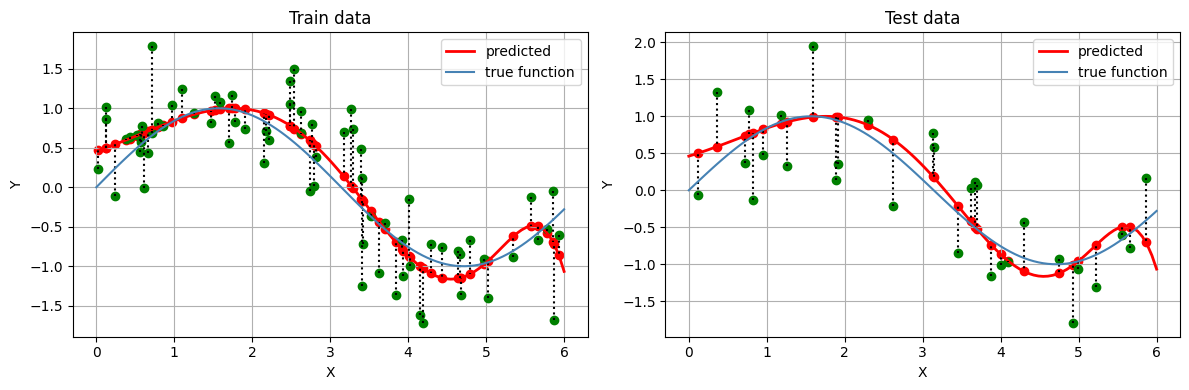

In [14]:
# Графики
xx = np.linspace(0, 6, 100).reshape(-1, 1)
plt.figure(figsize=[12, 4])

plt.subplot(1,2,1)

plt.title("Train data")
plt.plot(X_train, y_train, "o", color="green")
plt.plot(xx, pipeline.predict(xx), color="red", lw=2, label="predicted")
plt.scatter(X_train, y_train__pred, color="red")
plt.vlines(X_train, ymin=y_train, ymax=y_train__pred, colors="black", linestyles="dotted")
plt.plot(xx, f(xx), "-", color="SteelBlue", label="true function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)

plt.title("Test data")
plt.plot(X_test, y_test, "o", color="green")
plt.plot(xx, pipeline.predict(xx), color="red", lw=2, label="predicted")
plt.scatter(X_test, y_test__pred, color="red")
plt.vlines(X_test, ymin=y_test, ymax=y_test__pred, colors="black", linestyles="dotted")
plt.plot(xx, f(xx), "-", color="SteelBlue", label="true function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

## IRIS Data

In [15]:
X_lr = iris_data[['sepal_length']]
y_lr = iris_data['petal_length']
print(y_lr.size)
print(X_lr.size)

150
150


In [16]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.20, random_state=42)

In [17]:
POLY_DEGREE_lr = 100
pipeline_lr = Pipeline([
    ("polynomizer", PolynomialFeatures(degree=POLY_DEGREE_lr, include_bias=False)), 
    ("standardizer", StandardScaler()),
    ("linear_model", Ridge(alpha=REGULARIZATION, fit_intercept=True))
])

pipeline_lr.fit(X_lr_train, y_lr_train)

print("Параметры модели:")
print("\tw{} = {}".format(0, pipeline_lr.named_steps["linear_model"].intercept_))
for indx, coef in enumerate(pipeline_lr.named_steps["linear_model"].coef_):
    print("\tw{} = {}".format(indx+1, coef))

Параметры модели:
	w0 = 3.7275000000000085
	w1 = -5.988407374909293
	w2 = -0.08124256861430644
	w3 = 3.791795733059888
	w4 = 5.465017664276407
	w5 = 5.244782038080324
	w6 = 3.7069561095111765
	w7 = 1.5031643370169812
	w8 = -0.7852787739112249
	w9 = -2.7302886862915563
	w10 = -4.081839225689666
	w11 = -4.751432365356377
	w12 = -4.773525890325485
	w13 = -4.260868223995046
	w14 = -3.364057405987735
	w15 = -2.2403178640192487
	w16 = -1.0326307870319729
	w17 = 0.1418922690369332
	w18 = 1.1964761171375045
	w19 = 2.074227189350633
	w20 = 2.7447173345229934
	w21 = 3.1991215041501686
	w22 = 3.444969213347548
	w23 = 3.5011780849961576
	w24 = 3.3937365070107726
	w25 = 3.1521890395397087
	w26 = 2.8069395115301328
	w27 = 2.387305123216372
	w28 = 1.9202140822692788
	w29 = 1.429425445031517
	w30 = 0.9351530293863426
	w31 = 0.4539871497425984
	w32 = -0.0009756089874939266
	w33 = -0.41986725646874723
	w34 = -0.795704448365053
	w35 = -1.1240078758467518
	w36 = -1.402415283842274
	w37 = -1.63030873643076

In [18]:
# Предсказания на обучающем и тестовом множествах
y_lr_test__pred = pipeline_lr.predict(X_lr_test)

# Ошибки на тестовом множестве
mse_test_lr = mean_squared_error(y_lr_test, y_lr_test__pred)
r2_test_lr = r2_score(y_lr_test, y_lr_test__pred)

print("\nТестовое множество:")
print("\tTest MSE:", mse_test_lr)
print("\tTest R^2:", r2_test_lr)


Тестовое множество:
	Test MSE: 818.1475248480256
	Test R^2: -248.633947201608


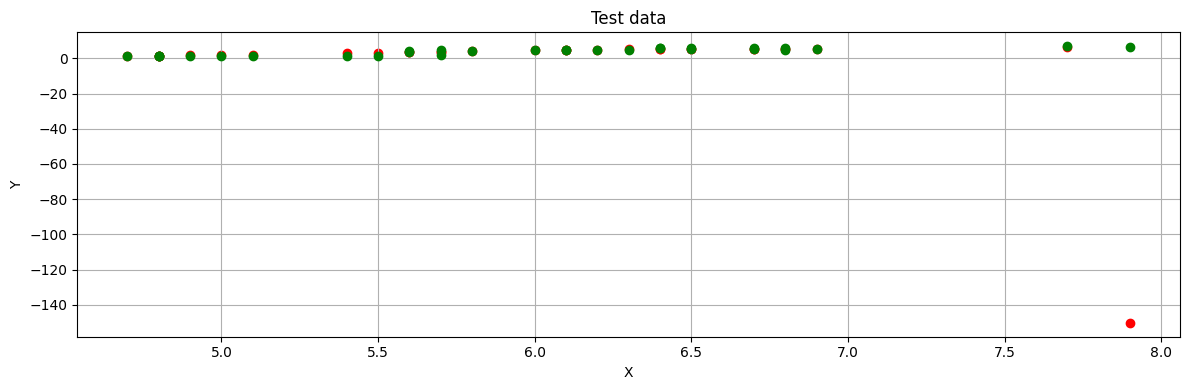

In [19]:
# Графики

plt.figure(figsize=[12, 4])

plt.title("Test data")
plt.plot(X_lr_test, y_lr_test, "o", color="green")

plt.scatter(X_lr_test, y_lr_test__pred, color="red")


plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

plt.tight_layout()

plt.show()

# Task 4. Data Generating

## Gaussian Noise Augmentation
Мы берём реальные наблюдения из датасета и добавляем к ним небольшой случайный шум, чтобы создать новые, немного отличающиеся, но всё ещё правдоподобные примеры.

In [20]:
# Количество синтетических копий (например, увеличим датасет на 50%)
augmentation_factor = 0.5
n_new_samples = int(len(iris_data) * augmentation_factor)
np.random.seed(42)
synthetic_samples = iris_data.sample(n=n_new_samples, replace=True).copy()

for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    std = iris_data[col].std() * 0.05  # 5% от стандартного отклонения признака
    synthetic_samples[col] += np.random.normal(0, std, size=n_new_samples)

augmented_df = pd.concat([iris_data, synthetic_samples], ignore_index=True)

# augmented_df.to_csv("iris_augmented.csv", index=False)

# Показываем размеры
print(f"Исходный размер: {iris_data.shape}")
print(f"Новый размер: {augmented_df.shape}")
augmented_df.head()

Исходный размер: (150, 5)
Новый размер: (225, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Task 5. Auto-ML

## H2O

In [13]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [9]:
# Инициализация H2O
h2o.init()

# Загрузка данных
data = h2o.import_file(r"C:\h2o_data\iris.data")
# Разделение данных на train и test
train, test = data.split_frame(ratios=[0.8], seed=42)
train.head()
# Указание целевой переменной и признаков
y = "C5"  
x = data.columns
x.remove(y)

# Запуск AutoML
aml = H2OAutoML(max_models=10, seed=42, max_runtime_secs=300)
aml.train(x=x, y=y, training_frame=train)

# Просмотр результатов
lb = aml.leaderboard
print(lb)

# Предсказание на тестовых данных
preds = aml.leader.predict(test)
print(preds)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 mins 41 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_Кубан_Иманбеков_a76rx4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.121 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
09:28:27.65: AutoML: XGBoost is not available; skipping it.
09:28:31.498: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 121.0.

██████████████████████████████████████████████████████████████| (done) 100%
model_id                                                  mean_per_class_error    logloss      rmse        mse
DeepLearning_grid_1_AutoML_1_20250422_92827_model_1                  0.0337607  0.0745874  0.154422  0.023846
GLM_1_AutoML_1_20250422_92827                                        0.0337607  0.0658835  0.144692  0.0209358
StackedEnsemble_BestOfFamily_1_AutoML_1_20250422_92827               0.0337607  0.0932688  0.166485  0.0277171
StackedEnsemble_AllModels_1_AutoML_1_20250422_92827                  0.042094   0.110651   0.182277  0.0332248
GBM_3_AutoML_1_20250422_92827            

In [10]:
# Преобразование H2OFrame в pandas DataFrame для визуализации
test_df = test.as_data_frame()
preds_df = preds.as_data_frame()

y_true = test_df[y]
y_pred = preds_df['predict']

d:\python\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
d:\python\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


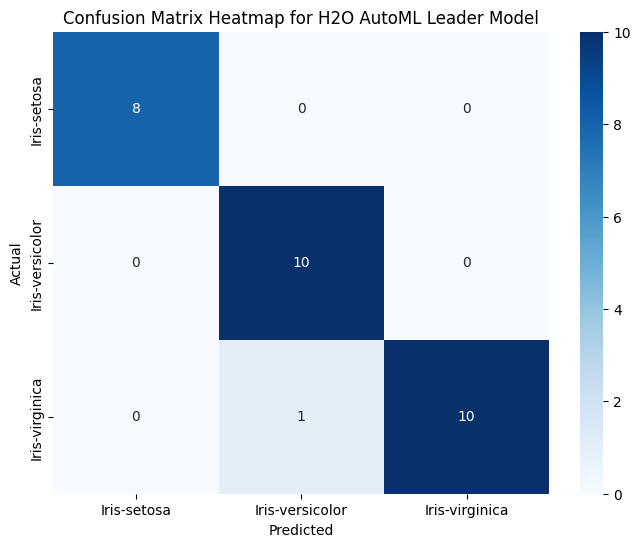

In [14]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_true), 
            yticklabels=np.unique(y_true))
plt.title('Confusion Matrix Heatmap for H2O AutoML Leader Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## TPOT

In [21]:
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tpot import TPOTClassifier
import pandas as pd

le = LabelEncoder()
df = iris_data.copy()
df['class'] = le.fit_transform(iris_data['class'])
X = df.drop(columns=['class'])
y = df['class']

# 2. Деление на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# 3. Инициализация и обучение AutoML
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_train, y_train)

# 4. Оценка
print("Test accuracy:", tpot.score(X_test, y_test))

# 5. Экспорт лучшего пайплайна
#tpot.export('best_pipeline.py')

d:\python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with f

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



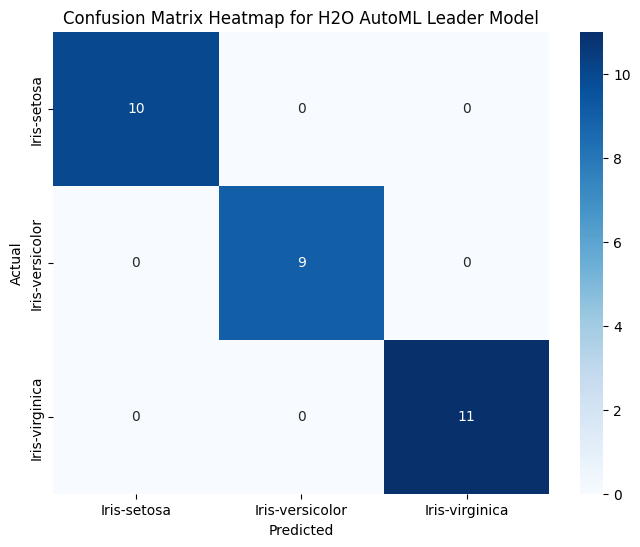

In [19]:
from best_pipeline import exported_pipeline

exported_pipeline.fit(X_train, y_train)
# Предсказания
y_pred = exported_pipeline.predict(X_test)

# Оценка качества
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_true), 
            yticklabels=np.unique(y_true))
plt.title('Confusion Matrix Heatmap for H2O AutoML Leader Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
# Сохранение модели
joblib.dump(exported_pipeline, 'tpot_model.pkl')
print("✅ Модель сохранена в tpot_model.pkl")

✅ Модель сохранена в tpot_model.pkl


## Развёртывание

In [30]:
pip install uvicorn

     -------------------------------------- 62.5/62.5 KB 303.7 kB/s eta 0:00:00
     -------------------------------------- 98.2/98.2 KB 511.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import uvicorn
from threading import Thread
from sklearn.metrics import f1_score, confusion_matrix

# Загрузка модели
model_path = 'tpot_model.pkl'
fedot_model = joblib.load(model_path)

# Создание приложения FastAPI
app = FastAPI()

# Определение модели данных
class DataInput(BaseModel):
    features: list  # Список с признаками

# Создание endpoint для получения предсказания
@app.post("/predict/")
async def predict(data: DataInput):
    features = np.array(data.features).reshape(1, -1)  # Преобразование данных в нужный формат
    prediction = fedot_model.predict(features=features)  # Получение предсказания
    return {"prediction": prediction.tolist()}

# Пример endpoint для получения метрик F1 и матрицы ошибок
@app.get("/metrics/")
async def get_metrics():
    # Предсказания для теста
    fedot_preds = fedot_model.predict(features=X_test_transformed)
    fedot_f1_macro = f1_score(y_test, fedot_preds, average='macro')
    fedot_f1_weighted = f1_score(y_test, fedot_preds, average='weighted')
    fedot_cm = confusion_matrix(y_test, fedot_preds)

    return {
        "F1 Macro": fedot_f1_macro,
        "F1 Weighted": fedot_f1_weighted,
        "Confusion Matrix": fedot_cm.tolist()
    }

# Запускаем приложение
def run_uvicorn():
    uvicorn.run(app, host="127.0.0.1", port=8000)

# Запускаем сервер FastAPI в отдельном потоке
server_thread = Thread(target=run_uvicorn)
server_thread.start()

print("Server is running at http://127.0.0.1:8000")

Server is running at http://127.0.0.1:8000


INFO:     Started server process [46288]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:56780 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:56780 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:56862 - "GET / HTTP/1.1" 404 Not Found
